In [9]:
!pip install seaborn

                                
    

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd 
import seaborn as sns

titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

AS YOU CAN SEE THESE ARE THE DATA SETS WE CAN USE AFTER USING THIS FUNCTION ( SNS.GET_DATASET_NAMES) CURRENTLY I AM USING TITANIC DATASET AND THIS DATASET IS ALSO MENTION IN THIS OUTPUT

HERE  WE SEE THE SURVIVE AND ALIVE DATA IS SIMILAR .. SO NOW , WE ANALyIs THE DATA

In [12]:
titanic_data['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [13]:
titanic_data['alive'].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

AS WE SEE IN PREVIOUS CODE BOTH ARE GIVING THE SAME OUTPUT 
NOW WE CROSS VERIFY THESE DATA OF SURVIVE AND ALIVE THAT WILL ENSURE THAT MY ASSUMPTION IS CORRECT OR NOT 

In [14]:
titanic_data[titanic_data['survived'] == 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [15]:
titanic_data[titanic_data['survived'] == 0] ['alive'].unique()

array(['no'], dtype=object)

IT GIVES NO AFTER USING UNIQUE MEANS THAT MY ASSUMPTION IS CORRECT
AFTER USING THESE CODE MY CONCLUSION IS THAT I CAN DELETE ONE OF THEM WHICH WILL NOT AFFECT OUR DATASETS
WE CAN DELETE ALIVE COLUMN BECAUSE IT IS IN STRING FORMAT 

In [16]:
# DATA CLEANING AND PREPROCESSING 

# Data cleaning is crucial for the success of any model... we will handle missing values,remove unnecessary column ,and convert categorical data into numeric data

In [17]:
# MY FIRST STEP IS TO CHECK NULL VALUES 

titanic_data.isnull().sum()

# here we see in our output there is null value in age,deck,embark it means that in this column this number which is already given is null 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:

titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].mode()[0])
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])

titanic_data['embark_town'] = titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0])
titanic_data['deck'] = titanic_data['deck'].fillna(titanic_data['deck'].mode()[0])

In [19]:
titanic_data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [20]:
# # FEATURE ENGINEERING

# Feature Engineering is the process of transforming raw data into meaningful features that improve a machine learning model’s performance.
# It involves creating, modifying, or selecting features from the dataset to enhance predictive power.



In [21]:
titanic_data['familySize'] = titanic_data['sibsp'] + titanic_data['parch'] + 1

del titanic_data['sibsp']
del titanic_data['parch']
del titanic_data['alive']

titanic_data




,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alone,familySize
0,0,3,male,22.0,7.2500,S,Third,man,True,C,Southampton,False,2
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,False,2
2,1,3,female,26.0,7.9250,S,Third,woman,False,C,Southampton,True,1
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,False,2
4,0,3,male,35.0,8.0500,S,Third,man,True,C,Southampton,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,C,Southampton,True,1
887,1,1,female,19.0,30.0000,S,First,woman,False,B,Southampton,True,1
888,0,3,female,24.0,23.4500,S,Third,woman,False,C,Southampton,False,4
889,1,1,male,26.0,30.0000,C,First,man,True,C,Cherbourg,True,1


In [22]:
# here now we cross verify this data

titanic_data.value_counts('survived')

survived
0    549
1    342
Name: count, dtype: int64

HERE WE SEE THE DATA IS IMBALANCE SO NOW WE PLOT THE DATA 

<Axes: ylabel='count'>

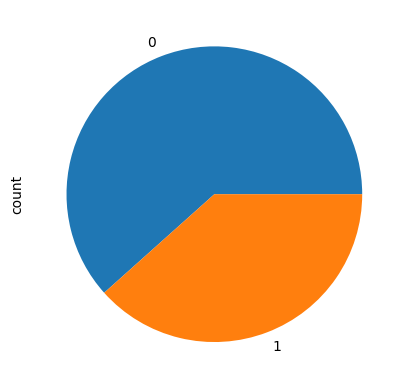

In [23]:
titanic_data.value_counts('survived').plot(kind = 'pie')

HERE WE WERE USING A CUSTOM CODE LIKE PREVIOUS CHART USING CHATGPT

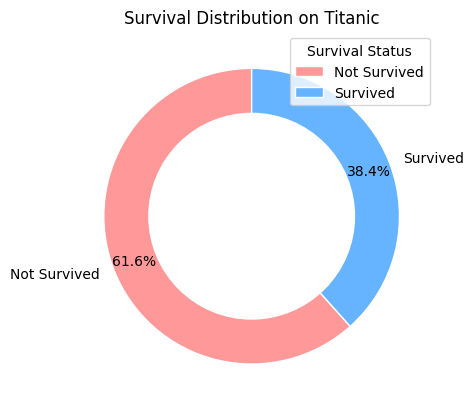

In [24]:
import matplotlib.pyplot as plt

# Custom colors for the chart
colors = ['#ff9999', '#66b3ff']  # Modify these as per your preference

# Count values for the 'survived' column
survival_counts = titanic_data['survived'].value_counts()

# Plot the donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    survival_counts, 
    labels=['Not Survived', 'Survived'], 
    autopct='%1.1f%%', 
    colors=colors,
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, 
    pctdistance=0.85
)

# Add a white circle in the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(center_circle)

# Add a legend
plt.legend(wedges, ['Not Survived', 'Survived'], title="Survival Status", loc="best")

# Set title and display the plot
plt.title('Survival Distribution on Titanic')
plt.show()


HERE WE SEE SEX ACCORDING TO THIS DATA OF SURVIVAL BY CHAGNG ONLY IN SURVIVED OPTION 

NOW WE WERE CHECKING THE SEX OF THE PEOPLE WHO SURIVED AND THE PEOPLE IS NOT SURVIVED 
HERE 0 INDICATES THAT PEOPLE IS NOT SURVIVED
AND  INDICATES THAT THE PEOPLE IS SURVIVED

In [25]:
titanic_data[titanic_data['survived']== 0] ['sex'].value_counts()

sex
male      468
female     81
Name: count, dtype: int64

In [26]:
titanic_data[titanic_data['survived'] == 1] ['sex'].value_counts()

sex
female    233
male      109
Name: count, dtype: int64

HERE THIS IS THE CHART WHICH IS WRITTEN IN PREVIOUS CODE OF SURVIVAL 

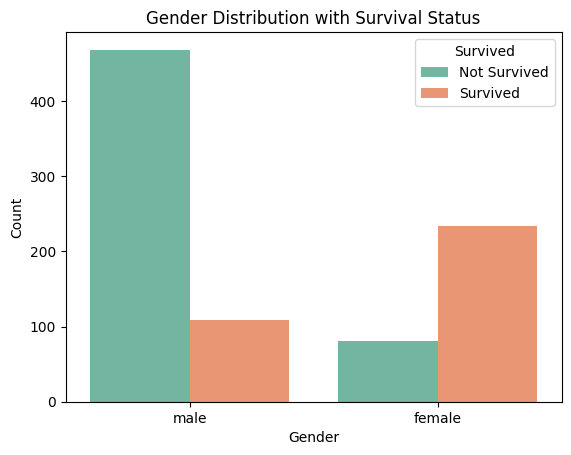

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting count plot with hue as 'survived'
sns.countplot(data=titanic_data, x='sex', hue='survived', palette='Set2')

# Adding title and labels
plt.title('Gender Distribution with Survival Status')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adding legend
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

# Display the plot
plt.show()


HERE WE SEE IN BELOW CODE OF EXACT NUMBER OF CODE OF MALE AND FEMALE SURVIVED OR NOT SURVIVED 
WE WERE SEARXH THIS ON CHATGPT USING notate the exact number soon every abr as well THIS FORMAT

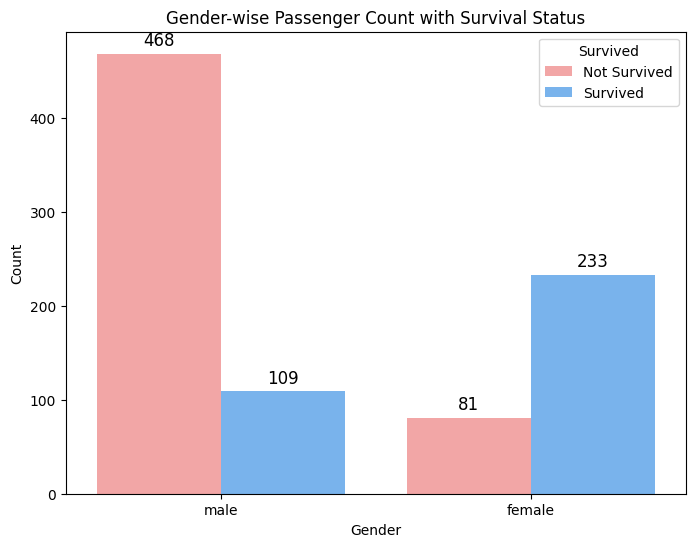

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=titanic_data, x='sex', hue='survived', palette=['#FF9999', '#66B3FF'])

# Annotate each bar with the exact count
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

# Add title and labels
plt.title('Gender-wise Passenger Count with Survival Status')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add legend
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

# Display the plot
plt.show()


NOW WE CHECK THE TOTAL PERCENTAGE OF MALE AND FEMALE SURVIVED BY USING CHATGPT 

In [29]:
# Calculate total male and female counts
gender_counts = titanic_data['sex'].value_counts()

# Calculate survived male and female counts
survived_gender_counts = titanic_data[titanic_data['survived'] == 1]['sex'].value_counts()

# Compute percentage
survival_percentage = (survived_gender_counts / gender_counts) * 100

# Display results
print(survival_percentage)


sex
female    74.203822
male      18.890815
Name: count, dtype: float64


HERE BELOW CODE WE WERE MAKING A PERCENTAGE CHART IN FORMAT OF DONUT 

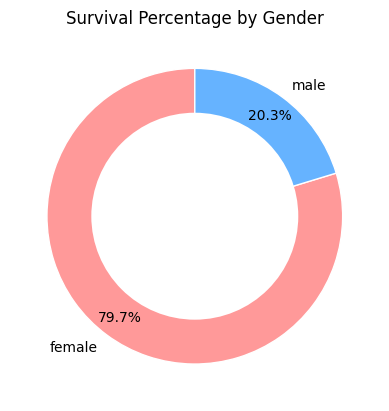

In [30]:
import matplotlib.pyplot as plt

# Calculate total male and female counts
gender_counts = titanic_data['sex'].value_counts()

# Calculate survived male and female counts
survived_gender_counts = titanic_data[titanic_data['survived'] == 1]['sex'].value_counts()

# Compute survival percentage
survival_percentage = (survived_gender_counts / gender_counts) * 100

# Labels and colors
labels = survival_percentage.index
colors = ['#FF9999', '#66B3FF']  # Custom colors

# Plot the donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    survival_percentage, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, 
    pctdistance=0.85
)

# Add a white circle to make it a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(center_circle)

# Add title
plt.title('Survival Percentage by Gender')

# Show the plot
plt.show()


AB HAME SURVIVAL CHANCE NIKALNA HAI ACCORDING TO FAMILY SIZE MATLV AGAR KOI AKELA GYA HUA TO USKA SURVIVAL RATE AGAR KOI 2 YA 3
ADMI KE SAATH GYA HO USKA SURVIVAL RATE KITNA HOGA PERCENATAGES ME .. NICHE AB HM CHART DEKHENGE 
niche diya hua output me 1 admi kul 537 log the boat pe to aisa hi iske accodring decide karenge 

In [31]:
titanic_data['familySize'].value_counts()

familySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

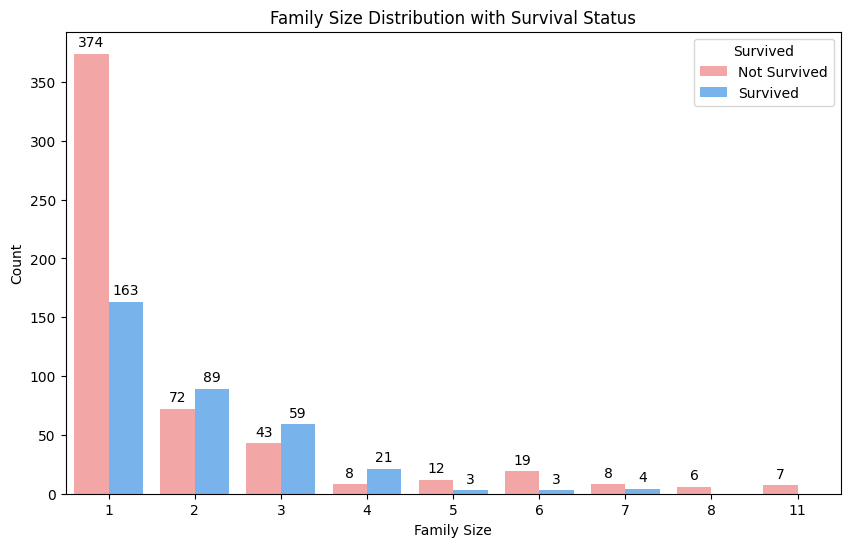

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=titanic_data, x='familySize', hue='survived', palette=['#FF9999', '#66B3FF'])

# Annotate bars with count values
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Add title and labels
plt.title('Family Size Distribution with Survival Status')
plt.xlabel('Family Size')
plt.ylabel('Count')

# Add legend
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])

# Display the plot
plt.show()


In [33]:
# Calculate total passengers per family size
family_counts = titanic_data['familySize'].value_counts()

# Calculate survived passengers per family size
survived_family_counts = titanic_data[titanic_data['survived'] == 1]['familySize'].value_counts()

# Compute survival percentage
survival_percentage = (survived_family_counts / family_counts) * 100

# Fill missing values with 0 (in case some family sizes had no survivors)
survival_percentage = survival_percentage.fillna(0)

# Sort for better readability
survival_percentage = survival_percentage.sort_index()

# Display results
print(survival_percentage)


familySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: count, dtype: float64


C:\Users\abhay jha\AppData\Local\Temp\ipykernel_16280\1430784703.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=survival_percentage.index, y=survival_percentage.values, palette='coolwarm')


Text(0.5, 1.0, 'Survival Percentage by Family')

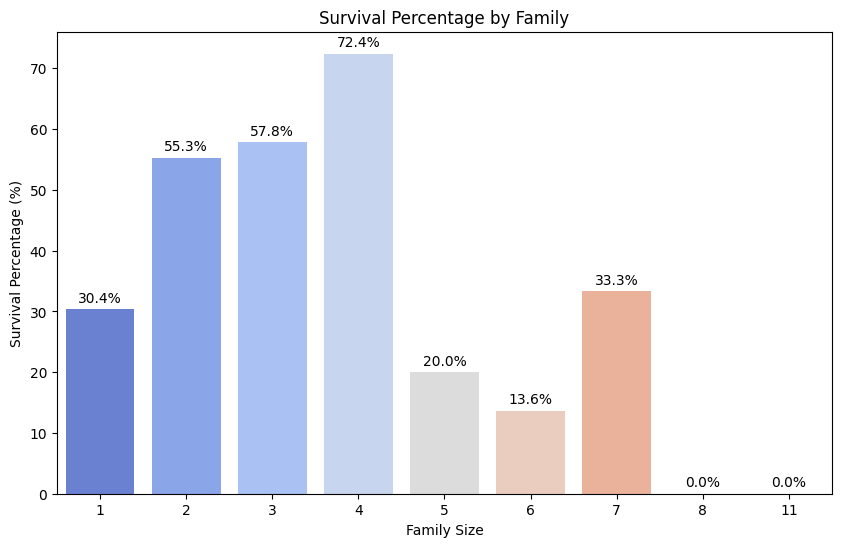

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total passengers per family size
family_counts = titanic_data['familySize'].value_counts()

# Calculate survived passengers per family size
survived_family_counts = titanic_data[titanic_data['survived'] == 1]['familySize'].value_counts()

# Compute survival percentage
survival_percentage = (survived_family_counts / family_counts) * 100
survival_percentage = survival_percentage.fillna(0).sort_index()  # Handle missing values and sort

# Plot the survival percentage
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=survival_percentage.index, y=survival_percentage.values, palette='coolwarm')

# Annotate each bar with percentage value
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=3)

# Add labels and title
plt.xlabel('Family Size')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Percentage by Family')


In [35]:
# yaha jitne bhi piche 3 chart hai it formed by using chatpt like this 
# this is my format to search on chatgpt to make a chart more easily 



# titanic_data['familySize']
# perform countplot with hue survived

HERE SOME OF THE QUESTIONS TO PRACTICE 


In [36]:
titanic_data

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alone,familySize
0,0,3,male,22.0,7.2500,S,Third,man,True,C,Southampton,False,2
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,False,2
2,1,3,female,26.0,7.9250,S,Third,woman,False,C,Southampton,True,1
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,False,2
4,0,3,male,35.0,8.0500,S,Third,man,True,C,Southampton,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,C,Southampton,True,1
887,1,1,female,19.0,30.0000,S,First,woman,False,B,Southampton,True,1
888,0,3,female,24.0,23.4500,S,Third,woman,False,C,Southampton,False,4
889,1,1,male,26.0,30.0000,C,First,man,True,C,Cherbourg,True,1


In [37]:
encoded_sex = pd.get_dummies(titanic_data['sex'], prefix='sex')
titanic_data = pd.concat([titanic_data, encoded_sex], axis=1)
titanic_data.drop('sex', axis=1, inplace=True)

titanic_data

,survived,pclass,age,fare,embarked,class,who,adult_male,deck,embark_town,alone,familySize,sex_female,sex_male
0,0,3,22.0,7.2500,S,Third,man,True,C,Southampton,False,2,False,True
1,1,1,38.0,71.2833,C,First,woman,False,C,Cherbourg,False,2,True,False
2,1,3,26.0,7.9250,S,Third,woman,False,C,Southampton,True,1,True,False
3,1,1,35.0,53.1000,S,First,woman,False,C,Southampton,False,2,True,False
4,0,3,35.0,8.0500,S,Third,man,True,C,Southampton,True,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,S,Second,man,True,C,Southampton,True,1,False,True
887,1,1,19.0,30.0000,S,First,woman,False,B,Southampton,True,1,True,False
888,0,3,24.0,23.4500,S,Third,woman,False,C,Southampton,False,4,True,False
889,1,1,26.0,30.0000,C,First,man,True,C,Cherbourg,True,1,False,True


WE USE THIS CODE BECAUSE MACHINE LEARNING MODELS CANNOT UNDERSTAND TEXT DATA;
THEY WORK BETTER WITH NUMERICALS VALUES.
SINCE THE 'SEX COLUMN IN THE TITANIC DATASET CONATINS CATEGORICAL DATA ('MALE' and 'FEMALE),
WE NEED TO CONVERT IT TO A NUMERICAL FORMAT.

THIS PROCESS IS CALLED ONE-HOT ENCODING, AND IT HELPS THE MODEL LEARN PATTERNS FROM THE DATA EFFICIENTLY.

CONVERT THE 'SEX' COLUMN INTO DUMMY VARIABLE 
PD.GET_DUMMIES() converts categorical values ('male', 'female') into separate columns with 0 and 1.


THE RESULT WILL BE 
  sex_female  sex_male
0         1         0
1         0         1
2         0         1
3         1         0

Here, sex_female is 1 if the person is female, otherwise 0.
sex_male is 1 if the person is male, otherwise 0.


titanic_data = pd.concat([titanic_data, encoded_sex], axis=1)
This merges the new sex_female and sex_male columns into titanic_data.



titanic_data.drop('sex', axis=1, inplace=True)
The original 'sex' column (which had values like 'male' and 'female') is deleted because we now have numerical values





Final DataFrame Structure:
before:

   sex
0  male
1  female
2  male
3  female

after:

   sex_female  sex_male
0         0         1
1         1         0
2         0         1
3         1         0



In [38]:
encoded_embark = pd.get_dummies(titanic_data['embarked'], prefix='embarked')
titanic_data = pd.concat([titanic_data, encoded_embark], axis=1)
titanic_data.drop('embarked', axis=1, inplace=True)

titanic_data

,survived,pclass,age,fare,class,who,adult_male,deck,embark_town,alone,familySize,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,7.2500,Third,man,True,C,Southampton,False,2,False,True,False,False,True
1,1,1,38.0,71.2833,First,woman,False,C,Cherbourg,False,2,True,False,True,False,False
2,1,3,26.0,7.9250,Third,woman,False,C,Southampton,True,1,True,False,False,False,True
3,1,1,35.0,53.1000,First,woman,False,C,Southampton,False,2,True,False,False,False,True
4,0,3,35.0,8.0500,Third,man,True,C,Southampton,True,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,Second,man,True,C,Southampton,True,1,False,True,False,False,True
887,1,1,19.0,30.0000,First,woman,False,B,Southampton,True,1,True,False,False,False,True
888,0,3,24.0,23.4500,Third,woman,False,C,Southampton,False,4,True,False,False,False,True
889,1,1,26.0,30.0000,First,man,True,C,Cherbourg,True,1,False,True,True,False,False


IT IS AS SAME AS PREVIOUS ONE WHICH I AM ALREADY ELABORATED 

In [39]:
titanic_data['class'] = titanic_data['class'].map({'Third': 3, 'First': 1, 'Second': 2})

titanic_data

,survived,pclass,age,fare,class,who,adult_male,deck,embark_town,alone,familySize,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,7.2500,3,man,True,C,Southampton,False,2,False,True,False,False,True
1,1,1,38.0,71.2833,1,woman,False,C,Cherbourg,False,2,True,False,True,False,False
2,1,3,26.0,7.9250,3,woman,False,C,Southampton,True,1,True,False,False,False,True
3,1,1,35.0,53.1000,1,woman,False,C,Southampton,False,2,True,False,False,False,True
4,0,3,35.0,8.0500,3,man,True,C,Southampton,True,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,2,man,True,C,Southampton,True,1,False,True,False,False,True
887,1,1,19.0,30.0000,1,woman,False,B,Southampton,True,1,True,False,False,False,True
888,0,3,24.0,23.4500,3,woman,False,C,Southampton,False,4,True,False,False,False,True
889,1,1,26.0,30.0000,1,man,True,C,Cherbourg,True,1,False,True,True,False,False


IN THAT CODE WE WERE ALREADY CHANGE THEM IN NUMERIC VALUE MEANS CLASS ALPHABETICAL VALUE CAHNGE TWO NUMERIC VALUES

In [40]:
encoded_who = pd.get_dummies(titanic_data['who'], prefix='who')
titanic_data = pd.concat([titanic_data, encoded_who], axis=1)
titanic_data.drop('who', axis=1, inplace=True)

titanic_data

,survived,pclass,age,fare,class,adult_male,deck,embark_town,alone,familySize,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,22.0,7.2500,3,True,C,Southampton,False,2,False,True,False,False,True,False,True,False
1,1,1,38.0,71.2833,1,False,C,Cherbourg,False,2,True,False,True,False,False,False,False,True
2,1,3,26.0,7.9250,3,False,C,Southampton,True,1,True,False,False,False,True,False,False,True
3,1,1,35.0,53.1000,1,False,C,Southampton,False,2,True,False,False,False,True,False,False,True
4,0,3,35.0,8.0500,3,True,C,Southampton,True,1,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,2,True,C,Southampton,True,1,False,True,False,False,True,False,True,False
887,1,1,19.0,30.0000,1,False,B,Southampton,True,1,True,False,False,False,True,False,False,True
888,0,3,24.0,23.4500,3,False,C,Southampton,False,4,True,False,False,False,True,False,False,True
889,1,1,26.0,30.0000,1,True,C,Cherbourg,True,1,False,True,True,False,False,False,True,False


encoded_who = pd.get_dummies(titanic_data['who'], prefix='who')
pd.get_dummies(titanic_data['who'], prefix='who') creates dummy variables (one-hot encoding) for the 'who' column.
If 'who' has values like 'man', 'woman', and 'child', this will generate new columns

who_man  who_woman  who_child
   1        0         0
   0        1         0
   0        0         1


In [41]:
encoded_deck = pd.get_dummies(titanic_data['deck'], prefix='deck')
titanic_data = pd.concat([titanic_data, encoded_deck], axis=1)
titanic_data.drop('deck', axis=1, inplace=True)

titanic_data

,survived,pclass,age,fare,class,adult_male,embark_town,alone,familySize,sex_female,...,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,22.0,7.2500,3,True,Southampton,False,2,False,...,False,True,False,False,False,True,False,False,False,False
1,1,1,38.0,71.2833,1,False,Cherbourg,False,2,True,...,False,False,True,False,False,True,False,False,False,False
2,1,3,26.0,7.9250,3,False,Southampton,True,1,True,...,False,False,True,False,False,True,False,False,False,False
3,1,1,35.0,53.1000,1,False,Southampton,False,2,True,...,False,False,True,False,False,True,False,False,False,False
4,0,3,35.0,8.0500,3,True,Southampton,True,1,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,2,True,Southampton,True,1,False,...,False,True,False,False,False,True,False,False,False,False
887,1,1,19.0,30.0000,1,False,Southampton,True,1,True,...,False,False,True,False,True,False,False,False,False,False
888,0,3,24.0,23.4500,3,False,Southampton,False,4,True,...,False,False,True,False,False,True,False,False,False,False
889,1,1,26.0,30.0000,1,True,Cherbourg,True,1,False,...,False,True,False,False,False,True,False,False,False,False


In [42]:
encoded_embark_town = pd.get_dummies(titanic_data['embark_town'], prefix='embark_town')
titanic_data = pd.concat([titanic_data, encoded_embark_town], axis=1)
titanic_data.drop('embark_town', axis=1, inplace=True)

titanic_data

,survived,pclass,age,fare,class,adult_male,alone,familySize,sex_female,sex_male,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,7.2500,3,True,False,2,False,True,...,False,False,True,False,False,False,False,False,False,True
1,1,1,38.0,71.2833,1,False,False,2,True,False,...,False,False,True,False,False,False,False,True,False,False
2,1,3,26.0,7.9250,3,False,True,1,True,False,...,False,False,True,False,False,False,False,False,False,True
3,1,1,35.0,53.1000,1,False,False,2,True,False,...,False,False,True,False,False,False,False,False,False,True
4,0,3,35.0,8.0500,3,True,True,1,False,True,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,2,True,True,1,False,True,...,False,False,True,False,False,False,False,False,False,True
887,1,1,19.0,30.0000,1,False,True,1,True,False,...,False,True,False,False,False,False,False,False,False,True
888,0,3,24.0,23.4500,3,False,False,4,True,False,...,False,False,True,False,False,False,False,False,False,True
889,1,1,26.0,30.0000,1,True,True,1,False,True,...,False,False,True,False,False,False,False,True,False,False


it is also as same as previous one 

In [43]:
titanic_data[titanic_data.columns] = titanic_data[titanic_data.columns].astype(float)

titanic_data.head()

,survived,pclass,age,fare,class,adult_male,alone,familySize,sex_female,sex_male,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0.0,3.0,22.0,7.2500,3.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,71.2833,1.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,7.9250,3.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.1000,1.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,8.0500,3.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


                                                   4 ELPLORATORY DATA ANALYSIS (EDS)
                                                   EDA helps us understand the data and draw insights that could be useful for feature selection.

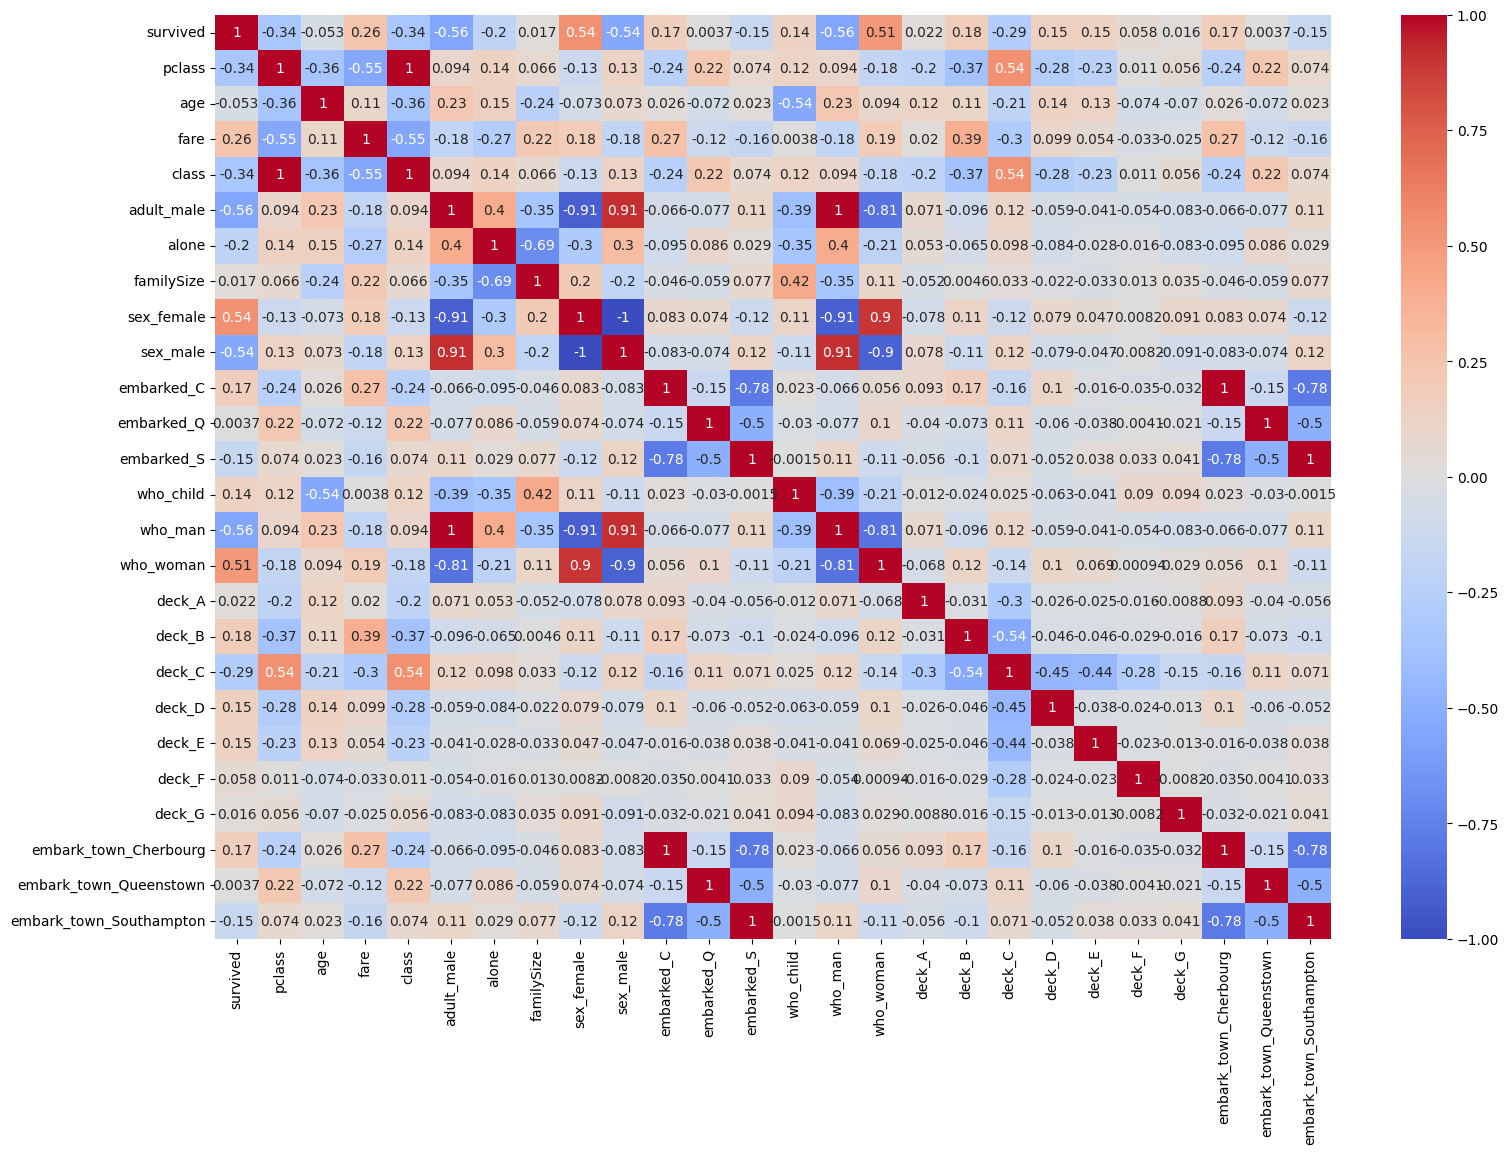

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 12))  # Adjust width and height as needed

# Visualizing the correlation between features
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm')
plt.show()

This code creates a heatmap to show the relationship between different features (columns) in the titanic_data dataset.

1️⃣ Import necessary libraries

import seaborn as sns
import matplotlib.pyplot as plt

seaborn (sns): Used for making attractive charts.
matplotlib.pyplot (plt): Helps display the chart.


2️⃣ Set the figure size


plt.figure(figsize=(18, 12))

This makes the heatmap large so the details are easy to see.
18, 12 controls the width and height of the chart.



3️⃣ Create the heatmap

sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm')


titanic_data.corr() calculates the correlation (relationship) between features.
sns.heatmap(...) creates a color-coded table:
🔴 Red → Strong positive relationship (both increase together).
🔵 Blue → Strong negative relationship (one increases, the other decreases).
⚪ Light color → Weak or no relationship.
annot=True → Shows numbers inside the boxes.
cmap='coolwarm' → Uses red-blue colors for better visibility.


In [45]:
corr_matrix = titanic_data.corr().abs()

# Set correlation threshold
threshold = 0.8

# Get column and index names where correlation is strong
col_names = corr_matrix.columns.tolist()
index_names = corr_matrix.index.tolist()

# Find strongly correlated pairs (excluding self-correlations)
strong_pairs = []
for i in range(len(col_names)):
    for j in range(i + 1, len(col_names)):  # Avoid redundant comparisons
        if corr_matrix.iloc[i, j] > threshold:
            strong_pairs.append((col_names[i], col_names[j]))

# Print the strongly correlated pairs
print("Strongly correlated pairs (above threshold", threshold, "):")

for pair in strong_pairs:
    print(pair)

Strongly correlated pairs (above threshold 0.8 ):
('pclass', 'class')
('adult_male', 'sex_female')
('adult_male', 'sex_male')
('adult_male', 'who_man')
('adult_male', 'who_woman')
('sex_female', 'sex_male')
('sex_female', 'who_man')
('sex_female', 'who_woman')
('sex_male', 'who_man')
('sex_male', 'who_woman')
('embarked_C', 'embark_town_Cherbourg')
('embarked_Q', 'embark_town_Queenstown')
('embarked_S', 'embark_town_Southampton')
('who_man', 'who_woman')


This code finds and prints pairs of features (columns) that have a strong correlation in the titanic_data dataset.

1️⃣ Calculate the absolute correlation matrix

corr_matrix = titanic_data.corr().abs()

titanic_data.corr() : finds the correlation between all columns.
.abs(): takes the absolute value (ignores negative signs).
The result is a table (matrix) where each value shows the strength of the relationship between two features.

2️⃣ Set the correlation threshold

threshold = 0.8

Only pairs with correlation > 0.8 are considered strongly correlated.


3️⃣ Get column and index names

col_names = corr_matrix.columns.tolist()
index_names = corr_matrix.index.tolist()

Extracts the names of the features (columns) from the correlation matrix.


4️⃣ Find strongly correlated pairs

strong_pairs = []
for i in range(len(col_names)):
    for j in range(i + 1, len(col_names)):  # Avoid redundant comparisons
        if corr_matrix.iloc[i, j] > threshold:
            strong_pairs.append((col_names[i], col_names[j]))



Loops through all feature pairs and checks if their correlation is above 0.8.
Avoids self-correlations (a feature is always 100% correlated with itself).
Avoids duplicate pairs (e.g., if A is correlated with B, it won’t check B with A again).
Stores strongly correlated pairs in the strong_pairs list.


5️⃣ Print the strongly correlated pairs

print("Strongly correlated pairs (above threshold", threshold, "):")

for pair in strong_pairs:
    print(pair)


Displays the list of strongly correlated features.

In [46]:
titanic_data = titanic_data.drop(columns= list(set([pair[1] for pair in strong_pairs])))

titanic_data

,survived,pclass,age,fare,adult_male,alone,familySize,embarked_C,embarked_Q,embarked_S,who_child,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0.0,3.0,22.0,7.2500,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,38.0,71.2833,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,3.0,26.0,7.9250,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,35.0,53.1000,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,3.0,35.0,8.0500,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,13.0000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,1.0,1.0,19.0,30.0000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
888,0.0,3.0,24.0,23.4500,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,1.0,1.0,26.0,30.0000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


This code removes highly correlated columns from titanic_data to reduce redundancy and improve model performance. 🚀